In [2]:
# import everything: 
import pyarrow.parquet as pa 
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import os


# load data: 

In [11]:
df_hbn = pd.read_csv('../data/HBN.csv')
columns = ['id', 'Enrol_Season', 'Age', 'Sex',
            'CGAS-Season', 'Physical-Season', 'FE-Season',
            'FGC-Season', 'BIA-Season', 
            'PAQ_A-Season', 'PAQ_C-Season',
            'PCIAT-Season', 'SDS-Season', 
            'PreInt_EduHx-Season', 'sii']

df_hbn_q = df_hbn[columns].copy()
df_hbn_q.head()

,id,Enrol_Season,Age,Sex,CGAS-Season,Physical-Season,FE-Season,FGC-Season,BIA-Season,PAQ_A-Season,PAQ_C-Season,PCIAT-Season,SDS-Season,PreInt_EduHx-Season,sii
0,00008ff9,Fall,5,0,Winter,Fall,NaN,Fall,Fall,NaN,NaN,Fall,NaN,Fall,2.0
1,000fd460,Summer,9,0,NaN,Fall,NaN,Fall,Winter,NaN,Fall,Fall,Fall,Summer,0.0
2,00105258,Summer,10,1,Fall,Fall,Fall,Fall,NaN,NaN,Summer,Fall,Fall,Summer,0.0
3,00115b9f,Winter,9,0,Fall,Summer,Summer,Summer,Summer,NaN,Winter,Summer,Summer,Winter,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN


# remove NaN sii,
# then remove NaN columns


In [12]:
df_hbn_sii = df_hbn.dropna(subset=['sii'])
df_hbn_sii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2736 non-null   int64  
 1   id                                      2736 non-null   object 
 2   Enrol_Season                            2736 non-null   object 
 3   Age                                     2736 non-null   int64  
 4   Sex                                     2736 non-null   int64  
 5   CGAS-Season                             2342 non-null   object 
 6   CGAS-Score                              2342 non-null   float64
 7   Physical-Season                         2595 non-null   object 
 8   Physical-BMI                            2527 non-null   float64
 9   Physical-Height                         2530 non-null   float64
 10  Physical-Weight                         2572 non-null   float64
 

<Axes: >

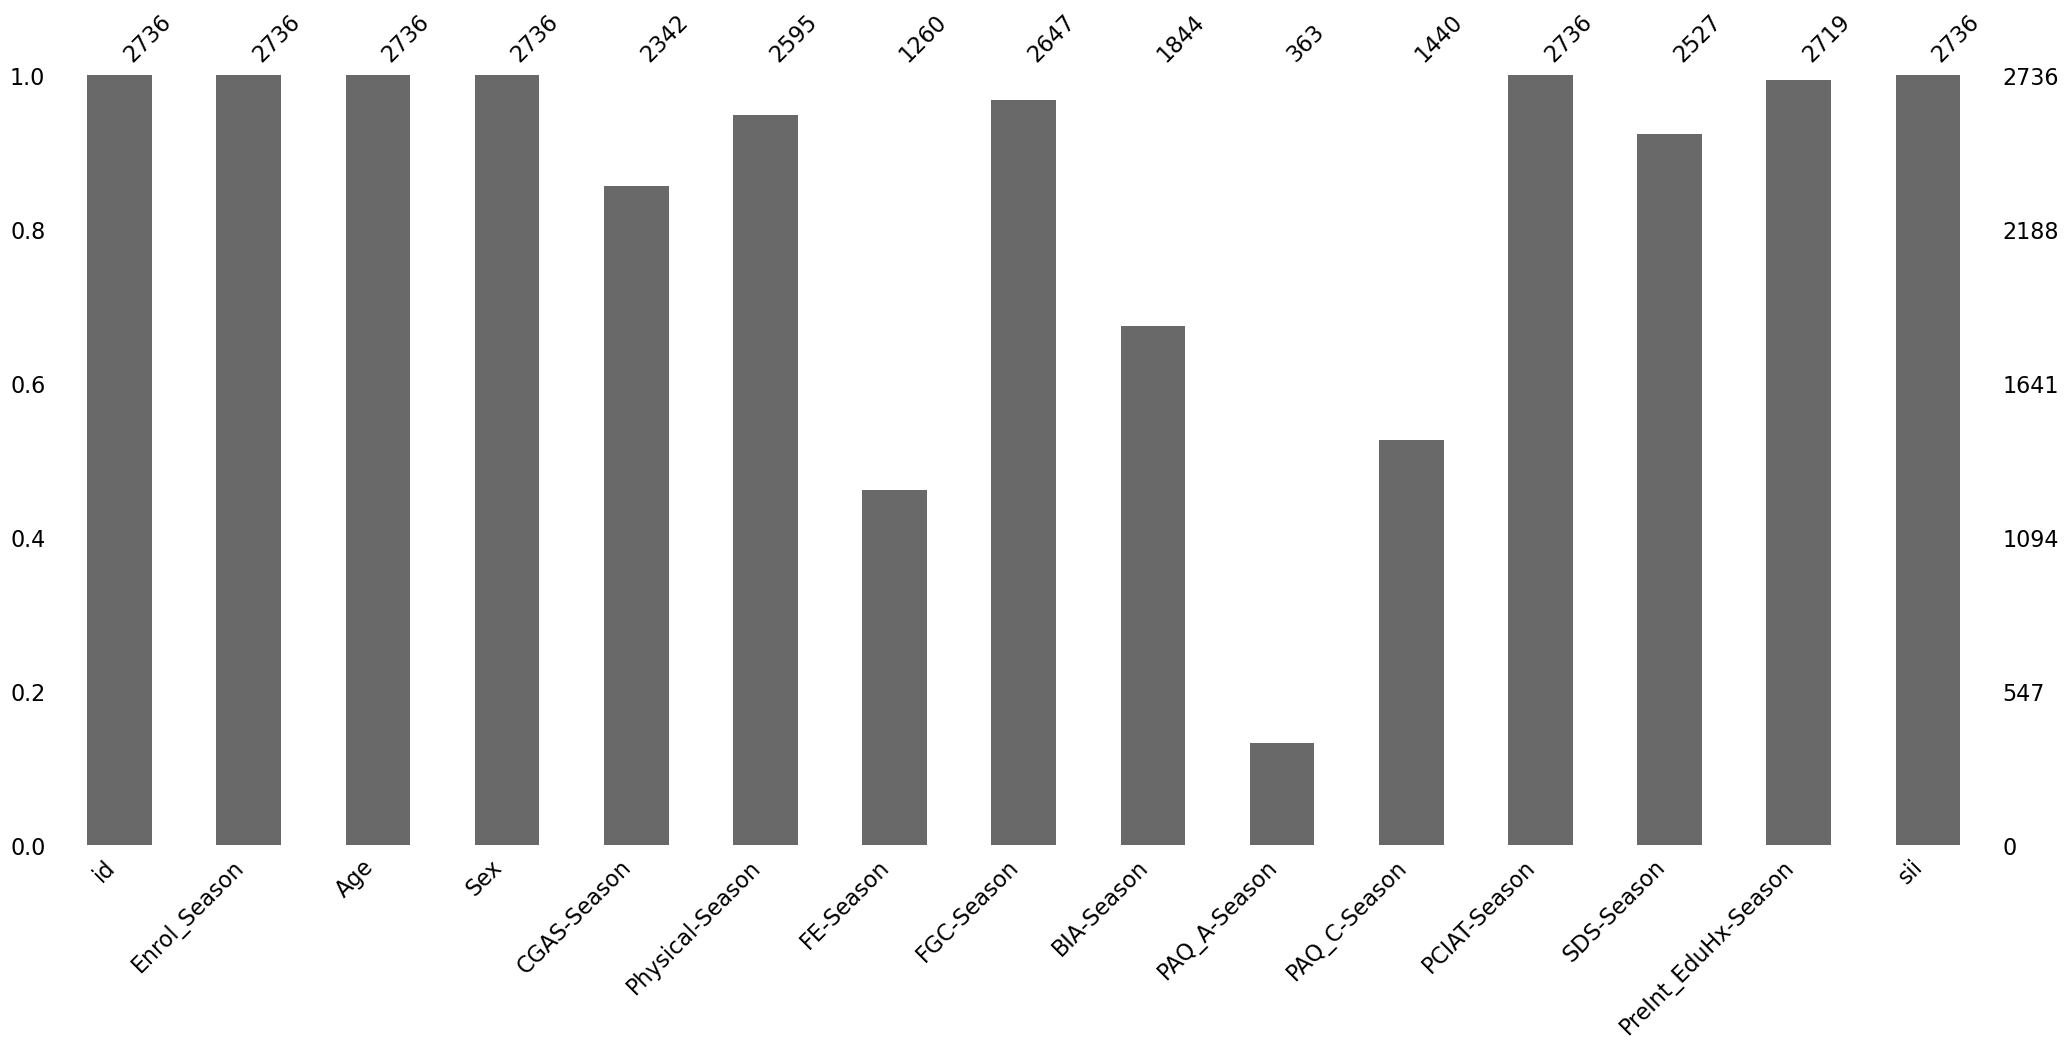

In [13]:
df_hbn_sii_q = df_hbn_sii[columns].copy()
%matplotlib inline
msno.bar(df_hbn_sii_q)


/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_6166/3136468885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbn_sii.loc[:, 'Merged_PAQ-Season'] = df_hbn_sii['PAQ_C-Season'].combine_first(df_hbn_sii['PAQ_A-Season'])
/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_6166/3136468885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbn_sii.loc[:,'Merged_PAQ_Total'] = df_hbn_sii['PAQ_C-PAQ_C_Total'].combine_first(df_hbn_sii['PAQ_A-PAQ_A_Total'])


<Axes: >

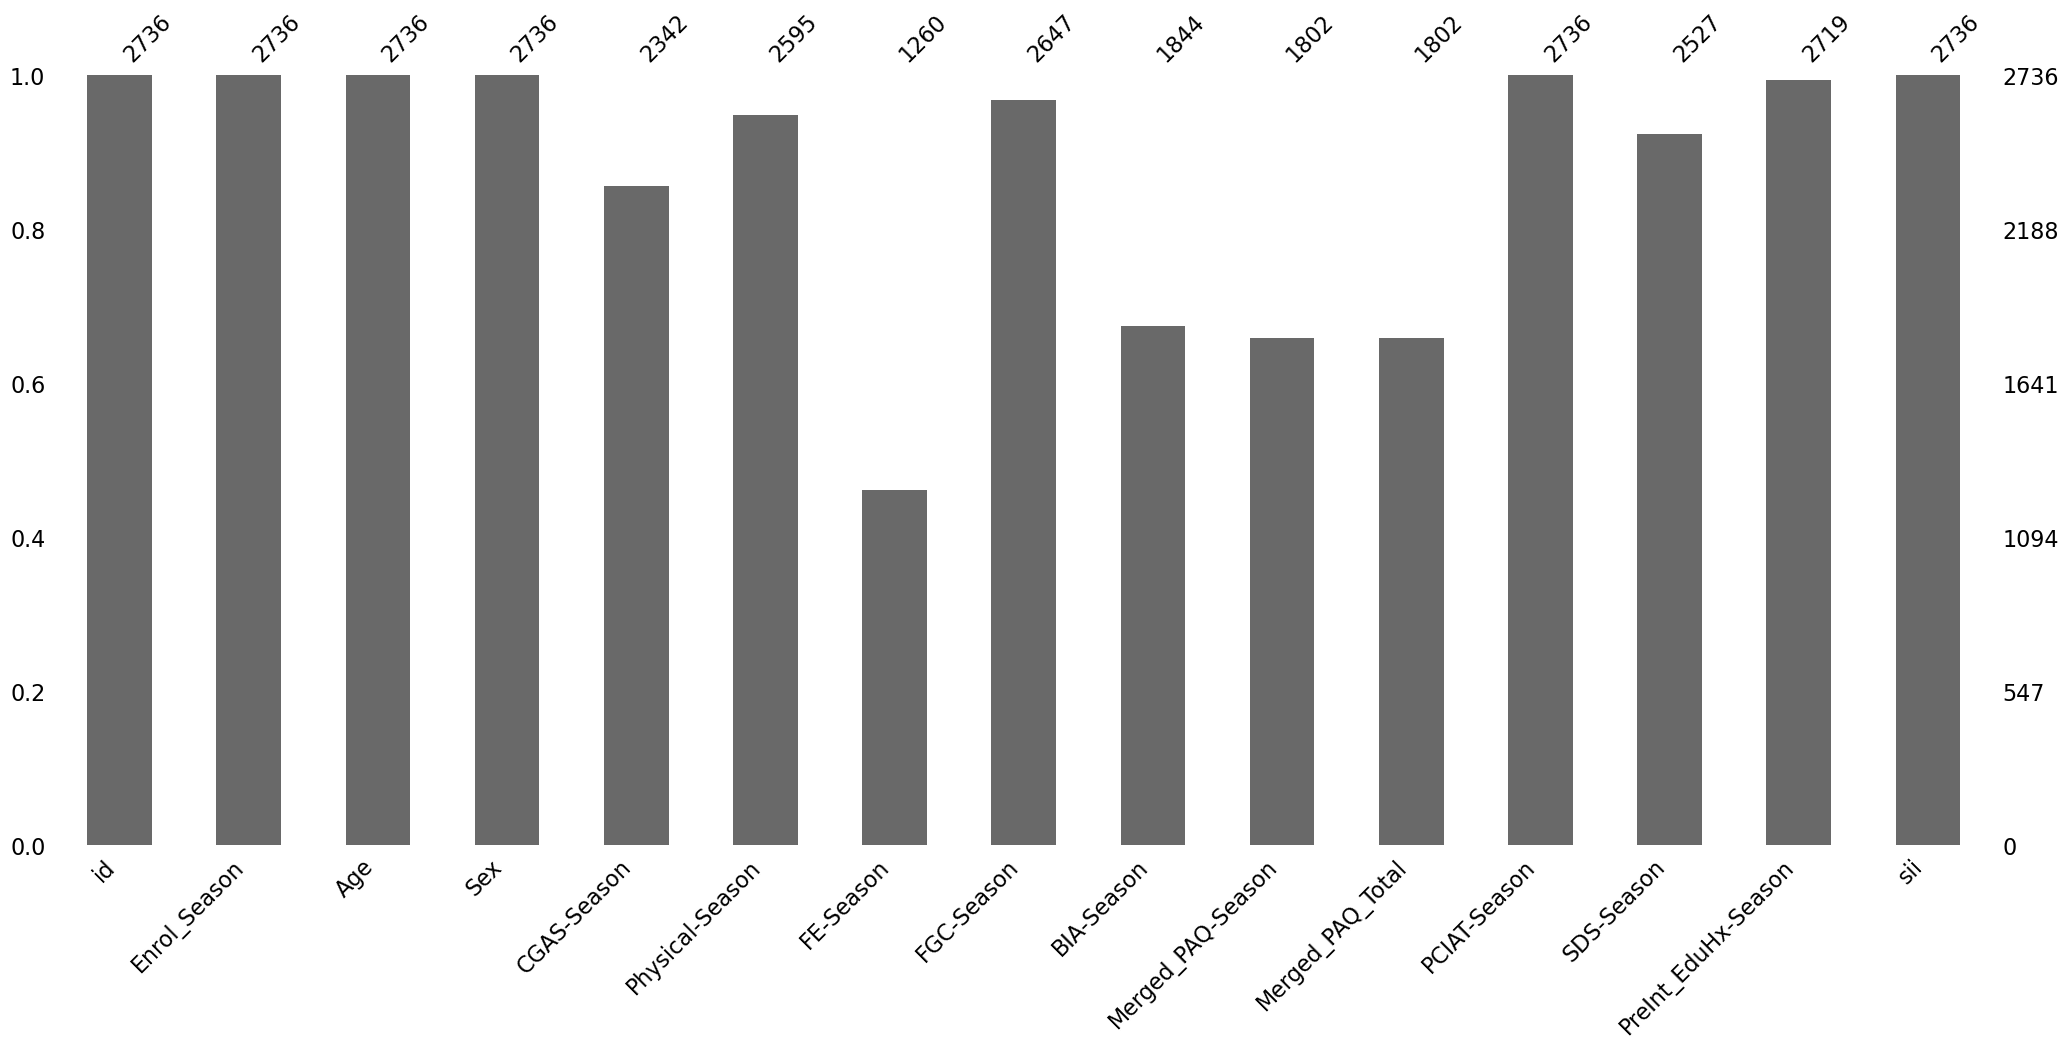

In [14]:
# merge PAQ_A and PAQ_C
df_hbn_sii.loc[:, 'Merged_PAQ-Season'] = df_hbn_sii['PAQ_C-Season'].combine_first(df_hbn_sii['PAQ_A-Season'])
df_hbn_sii.loc[:,'Merged_PAQ_Total'] = df_hbn_sii['PAQ_C-PAQ_C_Total'].combine_first(df_hbn_sii['PAQ_A-PAQ_A_Total'])

columns = ['id', 'Enrol_Season', 'Age', 'Sex',
            'CGAS-Season', 'Physical-Season', 'FE-Season',
            'FGC-Season', 'BIA-Season', 
            'Merged_PAQ-Season', 'Merged_PAQ_Total', 
            'PCIAT-Season', 'SDS-Season', 
            'PreInt_EduHx-Season', 'sii']

df_hbn_sii_q = df_hbn_sii[columns].copy()
%matplotlib inline
msno.bar(df_hbn_sii_q)


/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_6166/105669716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbn_sii.drop(pciat_columns, axis=1, inplace=True)


<Axes: >

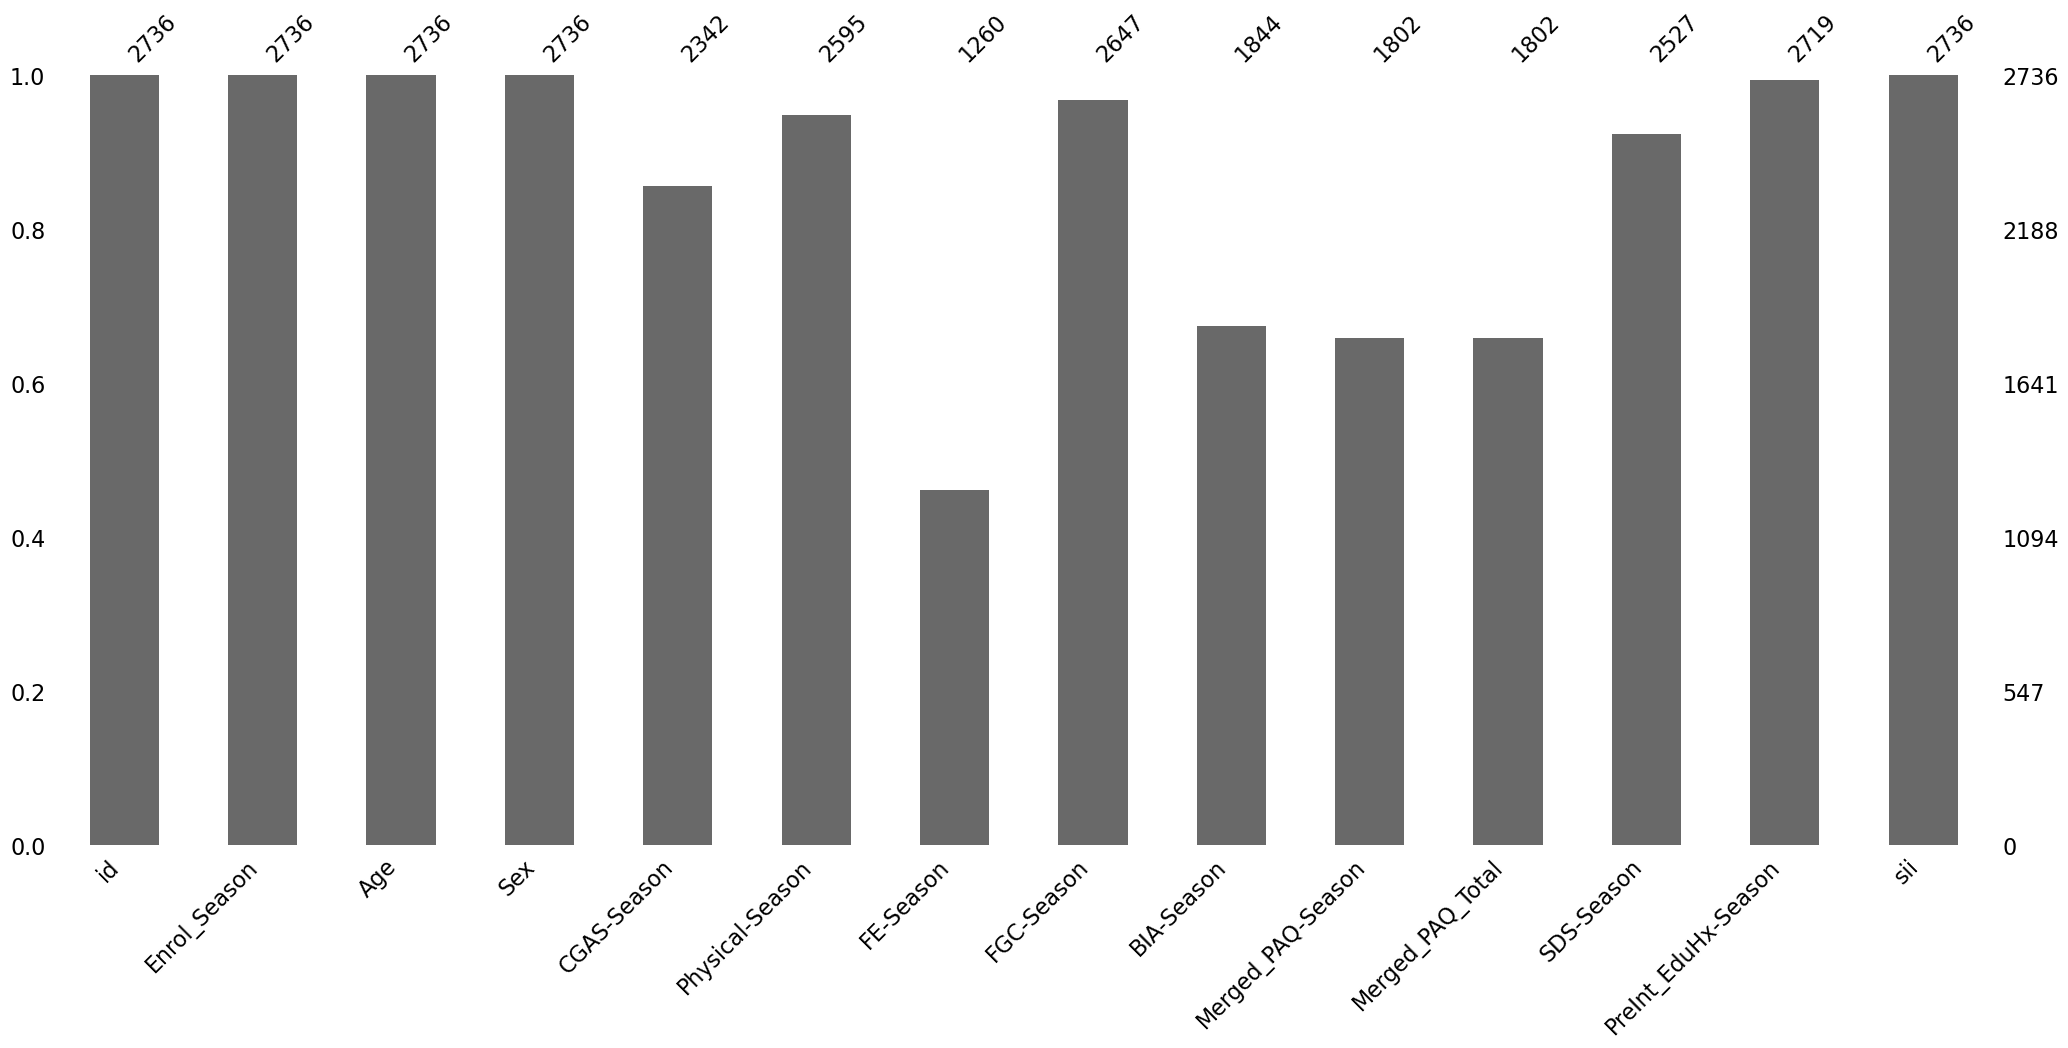

In [15]:
# Drop PCIAT columns: 
pciat_columns = [col for col in df_hbn_sii.columns if col.startswith('PCIAT')]

df_hbn_sii.drop(pciat_columns, axis=1, inplace=True)

columns = ['id', 'Enrol_Season', 'Age', 'Sex',
            'CGAS-Season', 'Physical-Season', 'FE-Season',
            'FGC-Season', 'BIA-Season', 
            'Merged_PAQ-Season', 'Merged_PAQ_Total', 
            'SDS-Season', 
            'PreInt_EduHx-Season', 'sii']

df_hbn_sii_q = df_hbn_sii[columns].copy()
%matplotlib inline
msno.bar(df_hbn_sii_q)

<Axes: >

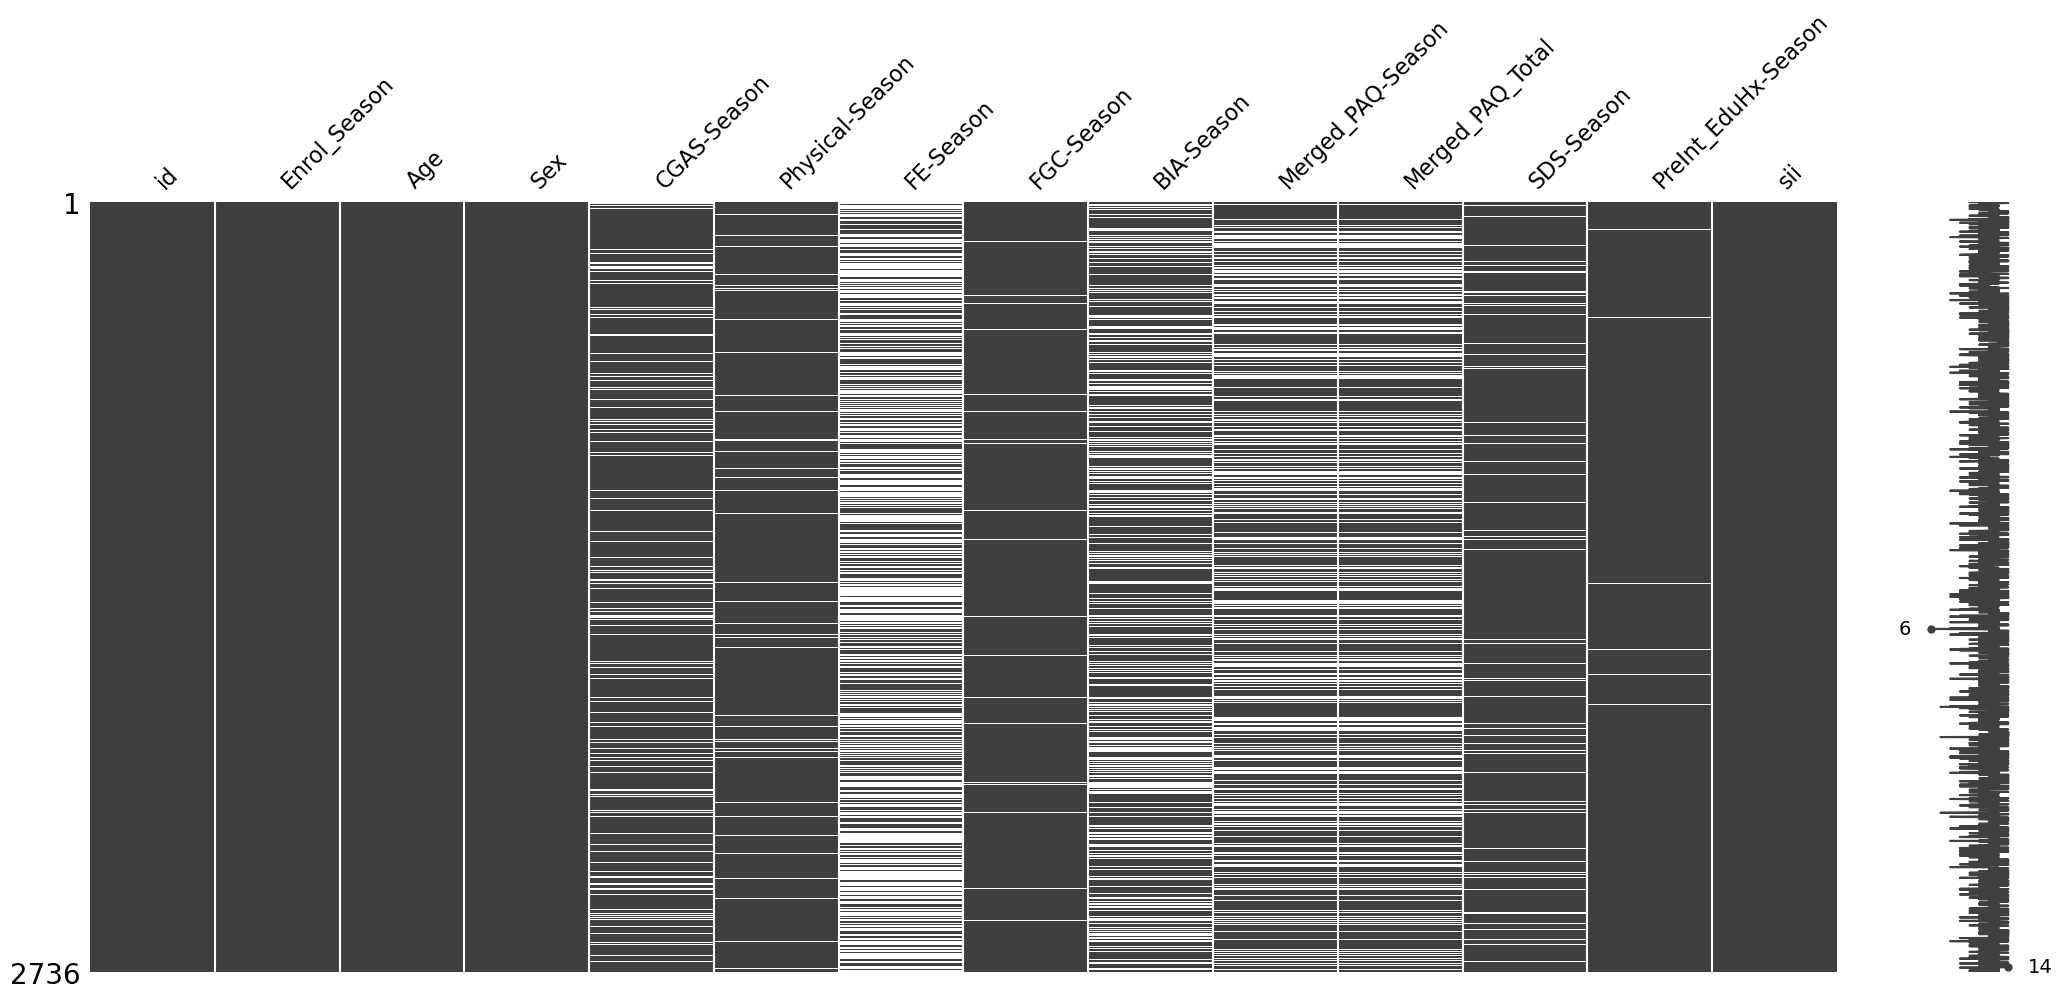

In [16]:
msno.matrix(df_hbn_sii_q)

# Drop Columns with more than 20% NaN values: 


In [17]:
df_hbn_sii_copy = df_hbn_sii.copy()

In [18]:
columns_to_drop = ['Merged_PAQ-Season', 'Merged_PAQ_Total']
for col in df_hbn_sii.columns:
    if col.startswith('FE') or col.startswith('BIA'):
        columns_to_drop.append(col)

print(columns_to_drop)
df_hbn_sii = df_hbn_sii.drop(columns_to_drop, axis=1)

print(df_hbn_sii.info())

['Merged_PAQ-Season', 'Merged_PAQ_Total', 'FE-Season', 'FE-Max_Stage', 'FE-Time_Mins', 'FE-Time_Sec', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']
<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2736 non-null   int64  
 1   id                                      2736 non-null   object 
 2   Enrol_Season                            2736 non-null   object 
 3   Age                                     2736 non-null   int64  
 4   Sex                                     2736 non-null   int64  
 5   CGAS-Season                     

<Axes: >

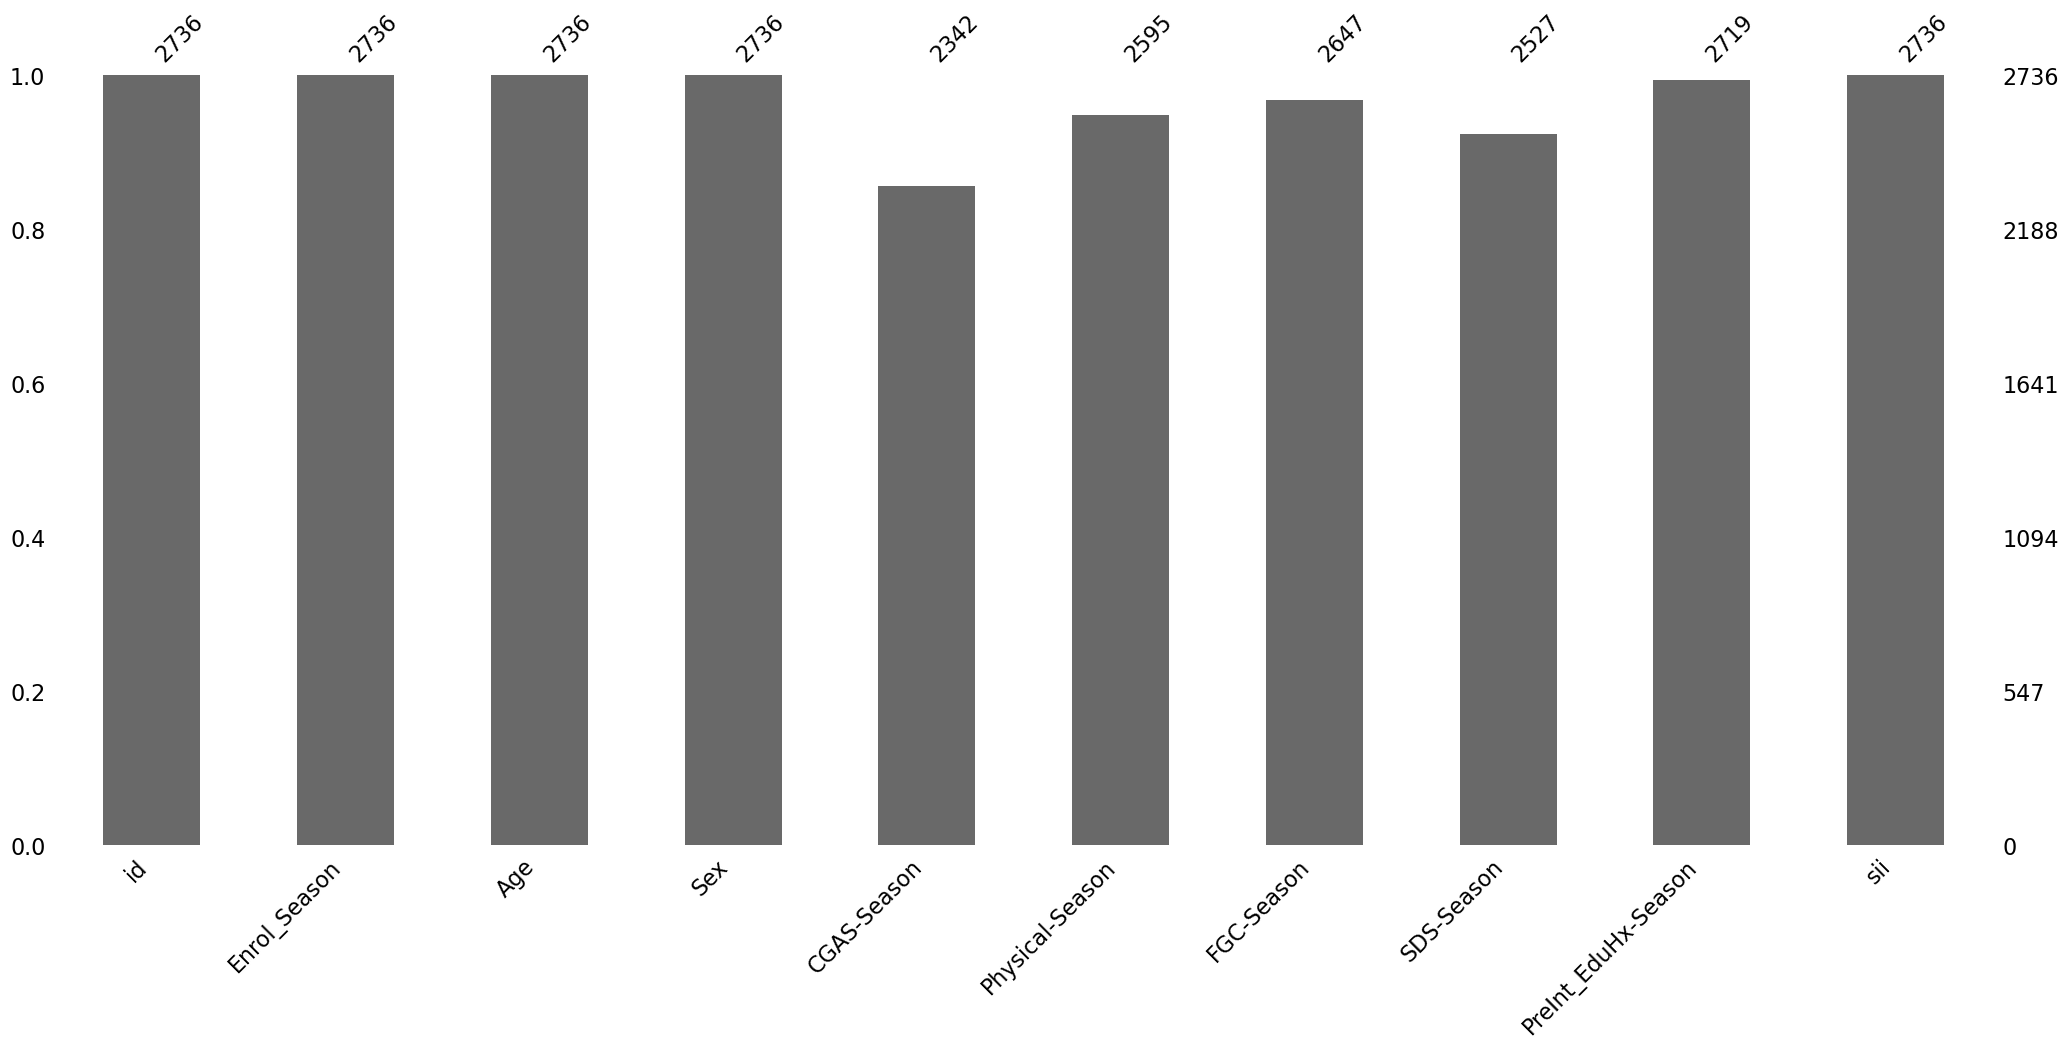

In [19]:
columns = ['id', 'Enrol_Season', 'Age', 'Sex',
            'CGAS-Season', 'Physical-Season',
            'FGC-Season', 
            'SDS-Season', 
            'PreInt_EduHx-Season', 'sii']

df_hbn_sii_q = df_hbn_sii[columns].copy()
%matplotlib inline
msno.bar(df_hbn_sii_q)

<Axes: >

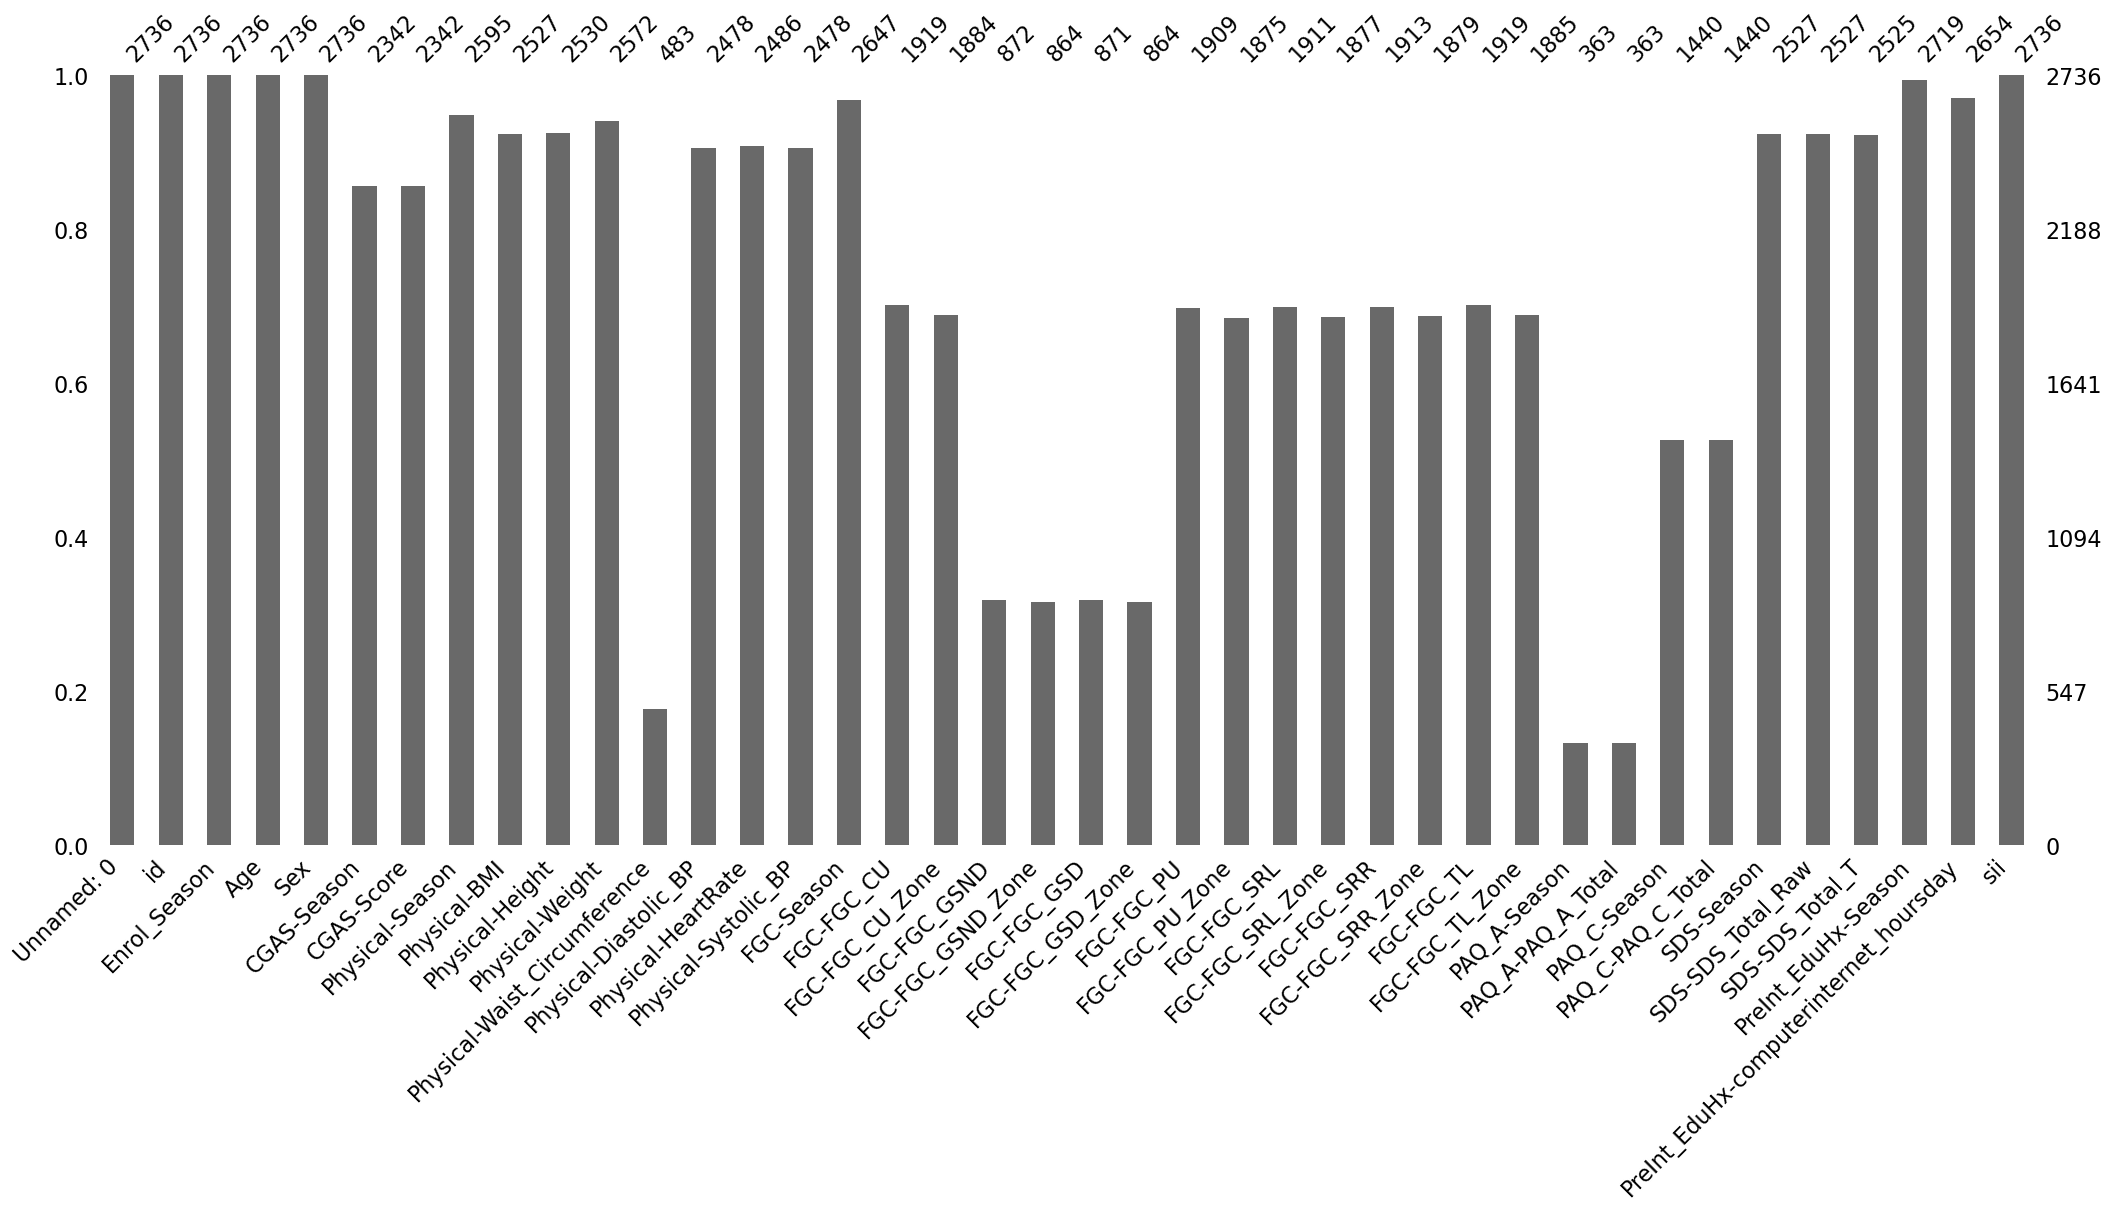

In [20]:
%matplotlib inline
msno.bar(df_hbn_sii)

In [21]:
df_hbn_sii_copy = df_hbn_sii.copy()

In [22]:
# drop columns with more than 20 percent NaN values: 

total_rows = df_hbn_sii.shape[0]

nan_percentage = df_hbn_sii.isnull().sum() / total_rows * 100

cols_to_drop = nan_percentage[nan_percentage > 20].index

print(cols_to_drop)

df_hbn_sii = df_hbn_sii.drop(columns=cols_to_drop, axis=1)

print(df_hbn_sii.info())


Index(['Physical-Waist_Circumference', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
       'PAQ_C-PAQ_C_Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2736 non-null   int64  
 1   id                                      2736 non-null   object 
 2   Enrol_Season                            2736 non-null   object 
 3   Age                                     2736 non-null   int64  
 4   Sex                                     2736 non-null   int64  
 5 

In [23]:
# just start with some obvious features: 
df_hbn_sii.columns

Index(['Unnamed: 0', 'id', 'Enrol_Season', 'Age', 'Sex', 'CGAS-Season',
       'CGAS-Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'FGC-Season', 'SDS-Season', 'SDS-SDS_Total_Raw',
       'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')

In [24]:
# just keep feature columns: 
keep_columns = ['Age', 'Sex', 
       'CGAS-Score', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP',  'SDS-SDS_Total_Raw',
       'SDS-SDS_Total_T', 
       'PreInt_EduHx-computerinternet_hoursday', 'sii']

df_hbn_X = df_hbn_sii[keep_columns].copy()
print(df_hbn_X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     2736 non-null   int64  
 1   Sex                                     2736 non-null   int64  
 2   CGAS-Score                              2342 non-null   float64
 3   Physical-BMI                            2527 non-null   float64
 4   Physical-Height                         2530 non-null   float64
 5   Physical-Weight                         2572 non-null   float64
 6   Physical-Diastolic_BP                   2478 non-null   float64
 7   Physical-HeartRate                      2486 non-null   float64
 8   Physical-Systolic_BP                    2478 non-null   float64
 9   SDS-SDS_Total_Raw                       2527 non-null   float64
 10  SDS-SDS_Total_T                         2525 non-null   float64
 

In [25]:
# fill numerical columns with median, categorical columns with mode
num_cols = df_hbn_X.select_dtypes(include=[np.number]).columns
cat_cols = df_hbn_X.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    col_med = df_hbn_X[col].median()
    df_hbn_X[col] = df_hbn_X[col].fillna(col_med)
for col in cat_cols:
    col_mode = df_hbn_X[col].mode()[0]
    df_hbn_X[col] = df_hbn_X[col].fillna(col_mode)

print(df_hbn_X.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     2736 non-null   int64  
 1   Sex                                     2736 non-null   int64  
 2   CGAS-Score                              2736 non-null   float64
 3   Physical-BMI                            2736 non-null   float64
 4   Physical-Height                         2736 non-null   float64
 5   Physical-Weight                         2736 non-null   float64
 6   Physical-Diastolic_BP                   2736 non-null   float64
 7   Physical-HeartRate                      2736 non-null   float64
 8   Physical-Systolic_BP                    2736 non-null   float64
 9   SDS-SDS_Total_Raw                       2736 non-null   float64
 10  SDS-SDS_Total_T                         2736 non-null   float64
 

In [17]:

# encode categorical variables


In [26]:
df_hbn_X_copy = df_hbn_X.copy()

In [27]:
# seperate target column
df_X = df_hbn_X.drop('sii', axis=1)
df_y = df_hbn_X['sii']

# test / train split

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, 
    test_size=0.15,   # 15% test
    random_state=42, # for reproducibility
    stratify=df_y       # keep target distribution consistent
)



In [20]:
# feature scaling


In [28]:
# model selection
# random forest

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)  # not always mandatory to scale for tree-based methods

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5888077858880778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       239
         1.0       0.37      0.26      0.31       110
         2.0       0.41      0.19      0.26        57
         3.0       0.25      0.20      0.22         5

    accuracy                           0.59       411
   macro avg       0.42      0.37      0.38       411
weighted avg       0.55      0.59      0.55       411



In [22]:
    

# hyperparameter tuning
# defaults
# without validation


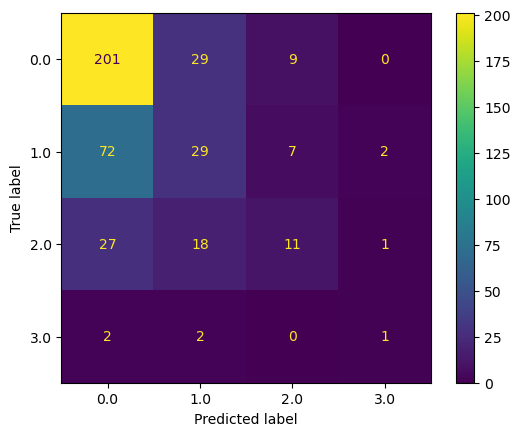

In [29]:
# model evaluation adn error analysis
y_pred_best = y_pred_rf
best_model = rf_clf

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()


In [30]:


xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5888077858880778
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       239
         1.0       0.37      0.30      0.33       110
         2.0       0.35      0.23      0.28        57
         3.0       0.00      0.00      0.00         5

    accuracy                           0.59       411
   macro avg       0.35      0.34      0.34       411
weighted avg       0.55      0.59      0.57       411



In [25]:



# without validation

# model deployment


